<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

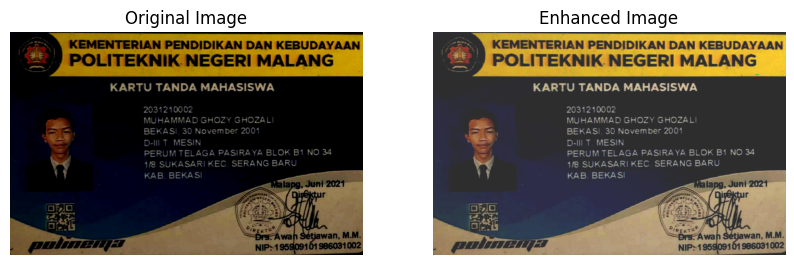

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/3C_2041720257_2 - Lian Mega Pertiwi.jpg'
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

brightness_increase = 45
brighter_image = np.clip(image_rgb + brightness_increase, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(brighter_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()